Load Data

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/raw/data.csv")

# Quick look at the data
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

Data Overview

In [ ]:
# Data overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

Missing Values

In [29]:
missing = df.isnull().sum()
print(missing)

# Strategy:
# No missing values, so no imputation is needed.
# If missing values existed:
# - Numerical: median imputation
# - Categorical: mode imputation or separate 'missing' category


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


Numerical Distributions

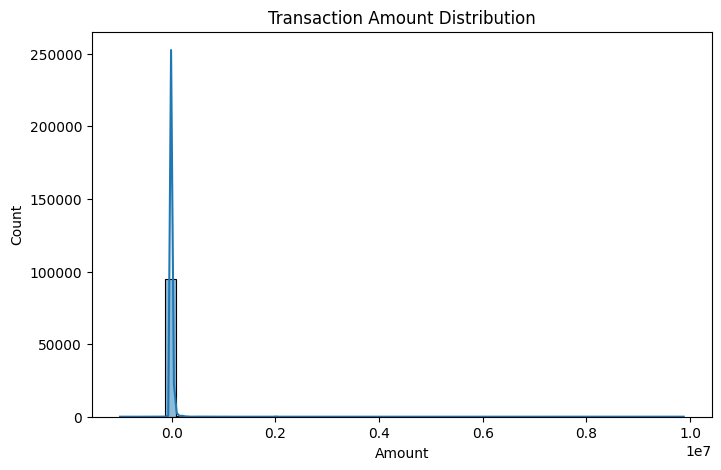

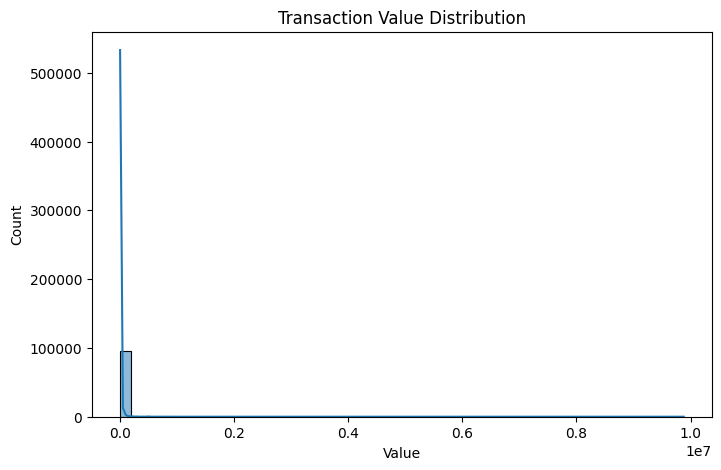

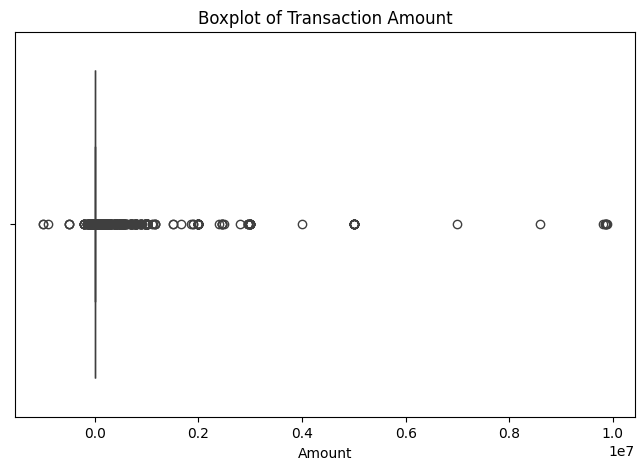

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Amount
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Histogram of Value
plt.figure(figsize=(8,5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title("Transaction Value Distribution")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()


Categorical Distributions

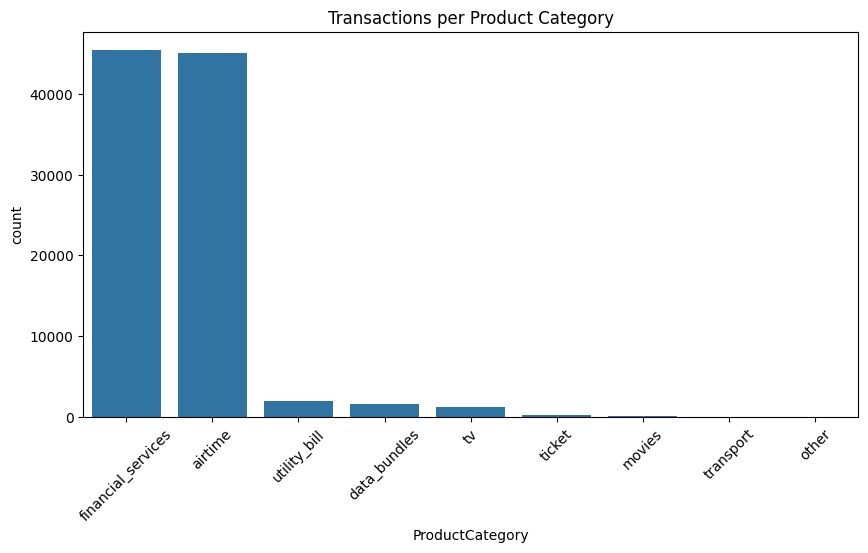

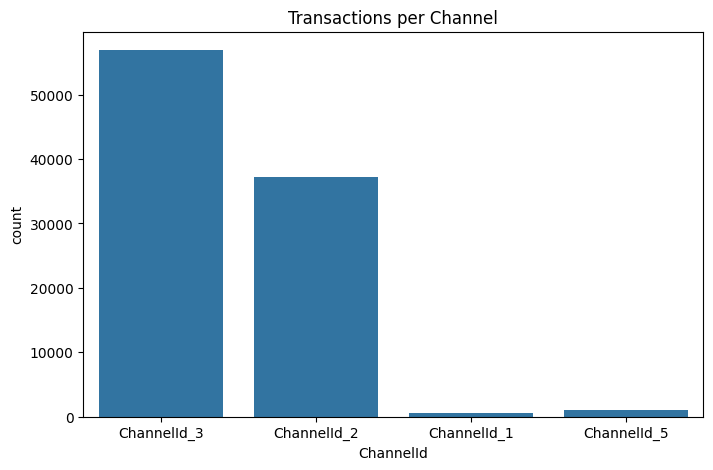

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Transactions per Product Category")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='ChannelId', data=df)
plt.title("Transactions per Channel")
plt.show()


Correlation Analysis

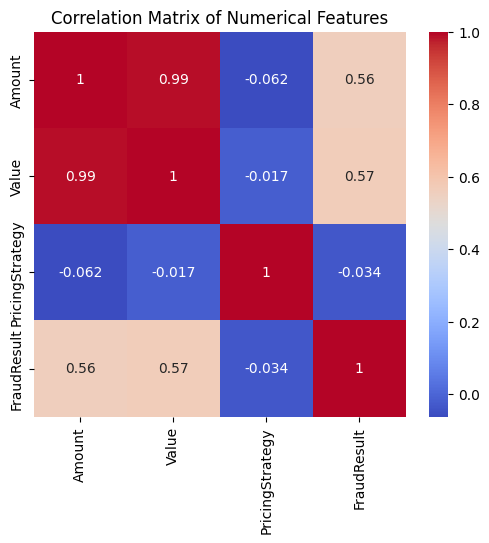

In [33]:
# Correlation matrix
numeric_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**EDA Key Insights:**

1. Transaction Amount and Value are highly skewed with significant outliers → consider log-transform or robust scaling.
2. Most customers transact infrequently, supporting the use of Frequency in RFM proxy creation.
3. Certain product categories dominate transactions, informing categorical encoding for features.
4. Dataset has no missing values → no imputation required.
5. Correlation between Amount and Value is strong → can be used to compute aggregated Monetary metrics.
